In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = np.full((300,300,3),255,dtype=np.uint8)
# cv2.imshow('ttt',img)

# while True:
#     if cv2.waitKey() == chr(27):
#         break
# cv2.destroyAllWindows()

In [22]:
img = np.zeros((300,300,3), dtype=np.uint8)
img[:,:,:]=255

np.min(img),np.max(img)

(255, 255)

In [38]:
import numpy as np, cv2

def draw_bar(img, pt, w, bars):
    pt = np.array(pt,int)
    for bar in bars:
        (x,y), h = pt, w*6
        cv2.rectangle(img, (x, y, w, h), (0,0,0), -1)
        if bar == 0:
            y, h = y + w*3-w//4 , w//2
            cv2.rectangle(img, (x, y, w, h), (255,255,255), -1)
        pt += (int(w*1.5), 0)

c= 200
r, sr, c2, c4 = c//2, c//4, c*2, c*4
img = np.full((c4,c4,3), 255, np.uint8)

blue, red = (255,0,0), (0,0,255)

cv2.ellipse(img, (c2,c2), (r,r),  0,0 , 180, blue, -1)
cv2.ellipse(img, (c2,c2), (r,r),  180,0 , 180, red, -1)
cv2.ellipse(img, (c2+r-sr,c2), (sr,sr),  180,0 , 180, blue, -1)
cv2.ellipse(img, (c2  -sr,c2), (sr,sr),  0,0 , 180, red, -1)

left = (c2 -c * (18+8)/24, c2-sr)
right = (c2 +c * (18+0)/24, c2-sr)

draw_bar(img, left, c//12, (1,1,1))
draw_bar(img, right, c//12, (0,0,0))
angle = cv2.fastAtan2(2,3)
img = cv2.warpAffine(img, cv2.getRotationMatrix2D((c2,c2), -angle*2, 1), (c4,c4))

draw_bar(img, left, c//12, (1,0,1))
draw_bar(img, right, c//12, (0,1,0))
ang = cv2.getRotationMatrix2D((c2,c2), angle, 1)
img = cv2.warpAffine(img, ang, (c4,c4))

cv2.imshow('img', img[c2-c:c2+c, c2-r*3:c2+r*3])
cv2.waitKey(0)

-1

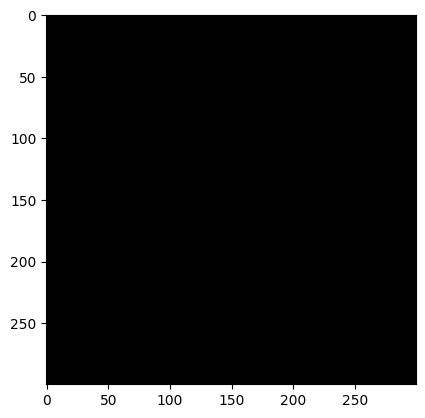

In [15]:
plt.imshow(img)

### **모자이크 효과의 원리**
* 원본에서 모자이크 할 영역을 추출한다
* 추출한 영역을 resize를 통해서 화질을 저하시킨다
* 효과를 적용한 영역을 원본 이미지의 원래 영역에 위치시킨다

#### **OpenCV에서의 얼굴 검출**
* Harr cascading
* 정면, 측면, 반측면등의 얼굴 위치를 찾는 좌표를 기록해놓은 xml 자료
* github에서 clone해와서 활용해보자

#### Harr cascading 이용한 눈, 얼굴 검출
* FaceDetection.py 참조